In [69]:
import numpy as np
np.set_printoptions(suppress=True)

import matplotlib.pyplot as plt
from matplotlib import cm

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d.axes3d import get_test_data

import pandas as pd
import seaborn as sns 

%run functions.ipynb

e.g.1 $f(x) = (x-2)^2$

In [70]:
theta, gd = gradient_descent([4], 1/2, 0.001) 

Text(0.5, 1.0, 'Batch Gradient Descent')

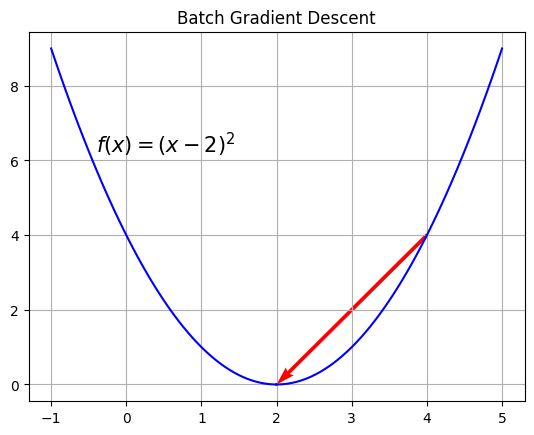

In [71]:
x = np.linspace(-1, 5, num=100)
plt.plot(x, (x-2)**2, c='b')
plt.text(-0.4, 6.2, '$f(x) = (x-2)^2$', fontsize=15)

plt.quiver(theta[:-1], gd[:-1], theta[1:]-theta[:-1], gd[1:]-gd[:-1], scale_units='xy', angles='xy', color='r', scale=1)
plt.grid()
plt.title('Batch Gradient Descent')

e.g.2 $f(x,y) = x^2 + y^2$

$\theta^{(0)} = \begin{bmatrix} \theta_x^{(0)} \\ \theta_y^{(0)} \end{bmatrix}$ 


$\theta^{(t)} = \begin{bmatrix} \theta_x^{(t-1)} \\ \theta_y^{(t-1)} \end{bmatrix} - \eta \begin{bmatrix} \frac{df}{d\theta_x} (\theta_x^{(t-1)}) \\ \frac{df}{d\theta_y} (\theta_y^{(t-1)}) \end{bmatrix}$

Stopping condition:

$f\Big(\begin{bmatrix} \theta_x^{(t)} \\ \theta_y^{(t)} \end{bmatrix}\Big) - f\Big(\begin{bmatrix} \theta_x^{(t-1)} \\ \theta_y^{(t-1)} \end{bmatrix}\Big)$ $<$ $\epsilon$

In [150]:
def feval(f, x, y):
    return eval(f)

theta_init = [3,2]
m = len(theta_init)
eta = 0.2
epsilon = 0.01

theta = np.array(theta_init).reshape(m,1)

f = input('Enter the function f(x, y) =')
df_x = input('Enter the function df(x) =')
df_y = input('Enter the function df(y) =')

t = 0

while True:
    t += 1
    theta = np.append(theta, theta[:,t-1].reshape(m,1) - eta*np.array([feval(df_x, theta[0,t-1], 0), feval(df_y, 0, theta[1,t-1])]).reshape(m,1), axis=1)
    
    if t > 5:
    # if abs(feval(f, theta[0,t], theta[1,t]) - feval(f, theta[0,t-1], theta[1,t-1])) < epsilon:
        break

In [153]:
gd = []
for i in range(theta.shape[1]):
    gd = np.append(gd, feval('x**2 + y**2', theta[0,i], theta[1,i]))

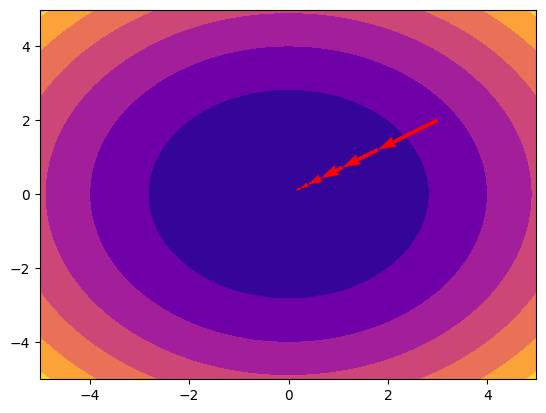

In [135]:
#fig = plt.figure(figsize=plt.figaspect(0.5)) # Set up a figure twice as wide as it is tall

x = np.arange(-5, 5, 0.02)
y = np.arange(-5, 5, 0.02)
X, Y = np.meshgrid(x, y)

# Set up the axes for the first plot
#ax = fig.add_subplot(1, 2, 1, projection='3d')
#ax.plot_surface(X, Y, X**2+Y**2, cmap = plt.cm.plasma)
#ax.set_title('$f(x,y) = x^2 + y^2$', fontsize=20)
#ax.set_xlabel('x', labelpad=20)
#ax.set_ylabel('y', labelpad=20)
#ax.set_zlabel('z', labelpad=20)

# Set up the axes for the second plot
#ax = fig.add_subplot(1, 2, 2)
plt.contourf(X, Y, X**2+Y**2, cmap = plt.cm.plasma)
#ax.set_title('Contour plot')
#ax.set_xlabel('x', labelpad=20)
#ax.set_ylabel('y', labelpad=20)

plt.quiver(np.delete(theta, theta.shape[1]-1, axis=1)[0,:], np.delete(theta, theta.shape[1]-1, axis=1)[1,:], 
           np.delete(theta, [0], axis=1)[0,:]-np.delete(theta, theta.shape[1]-1, axis=1)[0,:], 
           np.delete(theta, [0], axis=1)[1,:]-np.delete(theta, theta.shape[1]-1, axis=1)[1,:],  
           scale_units='xy', angles='xy', color='r', scale=1)

plt.show()

In [186]:
theta_full = np.append(theta, gd.reshape(1, 7), axis=0)

theta_full[2,0]

13.0

In [183]:
theta_full[:,1]

array([1.8 , 1.2 , 4.68])

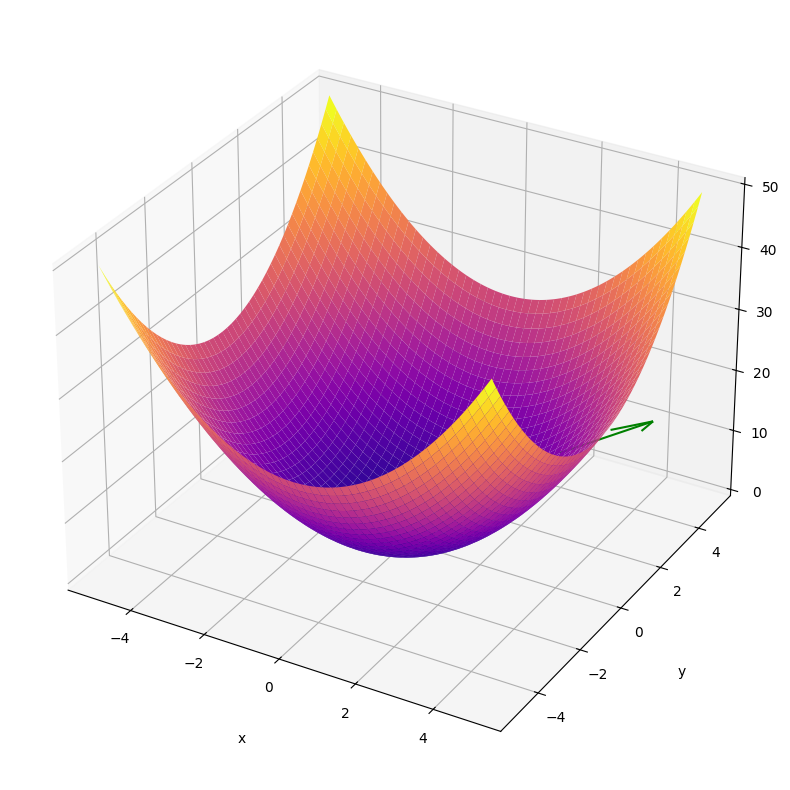

In [180]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, Y, X**2+Y**2, cmap=plt.cm.plasma)
ax.quiver(theta_full[0,0], theta_full[1,0], theta_full[2,0], theta_full[0,1], theta_full[1,1], theta_full[2,1], color='g')

ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
plt.show()